# Pendekatan pertama

## Data preparation

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.feature_selection import chi2, f_regression, f_classif, RFE

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [73]:
url = 'https://raw.githubusercontent.com/afiqilyasakmal/european-investment-management/main/data/european-investment-management-train.csv'
df_baru = pd.read_csv(url)
df_baru.head()

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth,book_value_growth,roa,roe,roic,bond_interest_rate_sensitivity,bond_credit_quality,average_coupon_rate,average_credit_quality,modified_duration,effective_maturity,asset_stock,asset_bond,asset_cash,asset_other,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,market_cap_giant,market_cap_large,market_cap_medium,market_cap_small,market_cap_micro,credit_aaa,credit_aa,credit_a,credit_bbb,credit_bb,credit_b,credit_below_b,credit_not_rated,holdings_n_stock,holdings_n_bonds,ongoing_cost,management_fees,environmental_score,social_score,governance_score,sustainability_score,sustainability_rank,sustainability_percentage_rank,involvement_abortive_contraceptive,involvement_alcohol,involvement_animal_testing,involvement_controversial_weapons,involvement_gambling,involvement_gmo,involvement_military_contracting,involvement_nuclear,involvement_palm_oil,involvement_pesticides,involvement_small_arms,involvement_thermal_coal,involvement_tobacco,nav_per_share_currency,nav_per_share,shareclass_size_currency,shareclass_size,fund_size_currency,fund_size,fund_trailing_return_ytd,fund_trailing_return_3years,fund_trailing_return_5years,fund_trailing_return_10years,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,fund_return_2015,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,fund_return_2019_q3,fund_return_2019_q2,fund_return_2019_q1,fund_return_2018_q4,fund_return_2018_q3,fund_return_2018_q2,fund_return_2018_q1,fund_return_2017_q4,fund_return_2017_q3,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,8.66,3.06,4.72,0.16,2.75,6.38,14.04,11.80,NaN,NaN,NaN,NaN,NaN,NaN,98.55,0.00,1.45,0.00,14.17,2.35,18.69,NaN,4.31,9.30,NaN,9.28,7.74,23.95,10.21,30.75,39.04,16.80,10.69,2.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,6.16,8.72,8.73,24.38,1.0,89.0,9.67,2.86,11.77,0.00,0.00,0.00,0.00,1.37,0.0,0.00,0.00,0.00,0.00,GBP,241.84,NOK,261930000.0,NOK,6.566210e+09,1.40,2.08,10.28,NaN,18.51,-11.31,15.24,28.74,NaN,5.66,18.05,-24.50,2.42,-0.41,8.18,7.40,-14.03,5.37,5.56,-7.25,3.53,1.79,1.95,7.25,6.06,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,9.34,14.30,7.55,8.56,9.59,7.36,14.61,11.33,NaN,NaN,NaN,NaN,NaN,NaN,96.81,0.57,2.63,-0.01,8.17,14.42,18.82,NaN,2.96,15.34,1.59,NaN,NaN,17.32,21.39,1.14,0.00,66.33,32.53,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,1.0,0.8400,0.75,5.31,8.85,7.16,26.08,2.0,78.0,3.93,0.00,14.93,0.00,0.00,0.00,4.91,0.00,0.0,2.38,0.00,1.59,0.00,USD,3.96,USD,17010000.0,USD,7.717900e+08,1.65,6.66,12.09,NaN,25.39,-5.72,1.74,41.98,7.12,0.89,17.82,-24.09,0.12,4.68,8.60,10.16,-16.02,6.56,11.32,-5.35,5.29,-1.81,-1.71,0.12,11.94,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,16.87,NaN,13.80,21.53,14.76,7.83,16.35,11.62,NaN,NaN,NaN,NaN,NaN,NaN,95.92,0.00,2.21,1.87,6.35,22.32,10.82,0.44,11.74,3.37,NaN,17.14,NaN,4.39,23.42,62.38,21.08,11.85,3.33,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,1.0182,0.75,4.23,8.38,6.99,24.98,4.0,44.0,0.26,0.00,2.83,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,GBP,2.32,GBP,30900000.0,GBP,1.282800e+08,45.43,13.19,18.48,7.76,22.29,-19.51,29.12,24.70,-5.99,17.13,27.23,-9.07,6.64,1.

In [74]:
metrics_list = ["roa", "roic", "roe", "historical_earnings_growth", "sales_growth", "book_value_growth", "price_prospective_earnings",
                "price_book_ratio", "price_sales_ratio", "price_cash_flow_ratio", "long_term_projected_earnings_growth"]
df_baru = df_baru[metrics_list]
df_baru.head()

,roa,roic,roe,historical_earnings_growth,sales_growth,book_value_growth,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,long_term_projected_earnings_growth
0,6.38,11.80,14.04,3.06,4.72,2.75,10.66,1.00,0.92,6.19,8.66
1,7.36,11.33,14.61,14.30,7.55,9.59,23.06,1.97,1.70,12.07,9.34
2,7.83,11.62,16.35,NaN,13.80,14.76,27.99,3.04,2.71,10.35,16.87
3,4.68,8.65,17.51,3.17,3.04,1.86,17.19,1.77,0.75,6.52,7.77
4,1.86,2.02,7.77,-14.02,-16.23,-2.83,12.15,1.01,0.62,3.54,10.02


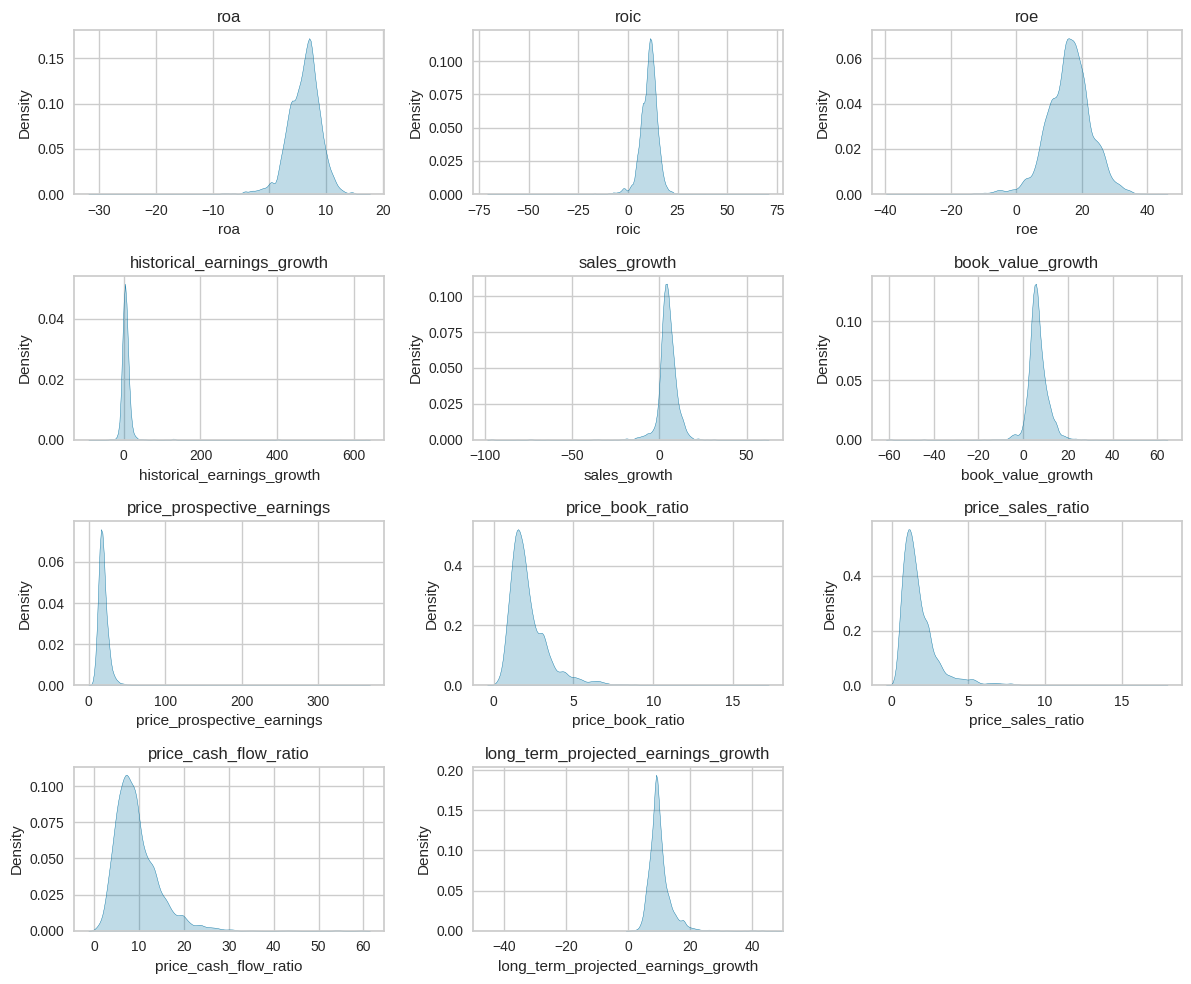

In [75]:
plt.figure(figsize=(12, 10))

columns = ["roa", "roic", "roe", "historical_earnings_growth", "sales_growth", "book_value_growth",
           "price_prospective_earnings", "price_book_ratio", "price_sales_ratio", "price_cash_flow_ratio",
           "long_term_projected_earnings_growth"]

# Loop melalui setiap kolom dan buat KDE plot
for column in columns:
    plt.subplot(4, 3, columns.index(column) + 1)
    sns.kdeplot(df_baru[column], fill=True)
    plt.title(column)

# Setel rentang x label
plt.xlim(-50, 50)

# Tampilkan plot
plt.tight_layout()
plt.show()

In [76]:
# Hitung skewness
skewness = df_baru.skew(axis=0)

print(f"Indeks skewness tiap kolom:\n{skewness}")

Indeks skewness tiap kolom:
roa                                    -1.335890
roic                                   -1.766279
roe                                    -0.423621
historical_earnings_growth             16.114147
sales_growth                           -5.439797
book_value_growth                      -2.253015
price_prospective_earnings             18.222159
price_book_ratio                        2.627665
price_sales_ratio                       2.974297
price_cash_flow_ratio                   2.179327
long_term_projected_earnings_growth     3.796048
dtype: float64


In [77]:
# Fungsi untuk mengecek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df_baru)

                            Total   Percent
roic                         1393  6.213202
roe                           245  1.092774
roa                           209  0.932203
sales_growth                   60  0.267618
price_cash_flow_ratio          55  0.245317
book_value_growth              54  0.240856
price_sales_ratio               8  0.035682
historical_earnings_growth      6  0.026762
price_prospective_earnings      6  0.026762
price_book_ratio                4  0.017841


In [78]:
df_baru['roic'] = df_baru['roic'].fillna(df_baru['roic'].median())
df_baru['roe'] = df_baru['roe'].fillna(df_baru['roe'].mean())
df_baru['roa'] = df_baru['roa'].fillna(df_baru['roa'].median())
df_baru['sales_growth'] = df_baru['sales_growth'].fillna(df_baru['sales_growth'].median())
df_baru['price_cash_flow_ratio'] = df_baru['price_cash_flow_ratio'].fillna(df_baru['price_cash_flow_ratio'].median())
df_baru['book_value_growth'] = df_baru['book_value_growth'].fillna(df_baru['book_value_growth'].median())
df_baru['price_sales_ratio'] = df_baru['price_sales_ratio'].fillna(df_baru['price_sales_ratio'].median())
df_baru['historical_earnings_growth'] = df_baru['historical_earnings_growth'].fillna(df_baru['historical_earnings_growth'].median())
df_baru['price_prospective_earnings'] = df_baru['price_prospective_earnings'].fillna(df_baru['price_prospective_earnings'].median())
df_baru['price_book_ratio'] = df_baru['price_book_ratio'].fillna(df_baru['price_book_ratio'].median())

In [79]:
cek_null(df_baru)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [80]:
X = df_baru.drop(columns=['long_term_projected_earnings_growth'])
y = df_baru['long_term_projected_earnings_growth']

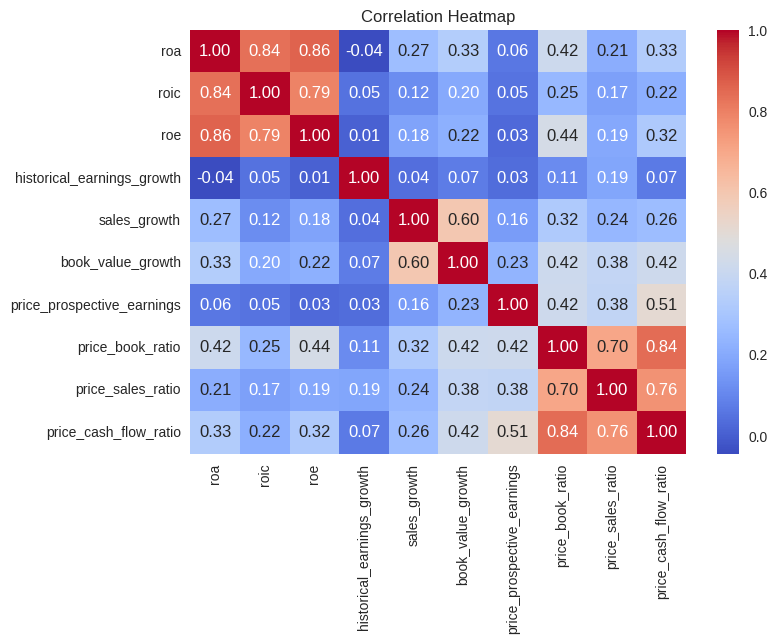

In [81]:
heatmap = sns.heatmap(X.corr(), cmap='coolwarm', annot=True, fmt='.2f')

heatmap.set_title('Correlation Heatmap')
fig = heatmap.get_figure()
plt.show()

## Membangun model

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

In [83]:
def visualize_result(model, X_train, X_test, y_train, y_test):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

### Linear regression

In [84]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
y_pred

array([ 8.46620982, 11.41293953, 11.55697217, ...,  8.19987592,
       10.267997  ,  9.14316673])

Mean Squared Error (MSE): 11.125095757978846
Mean Absolute Error (MAE): 1.988968444960411
Root Mean Squared Error (RMSE): 3.335430370728618


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


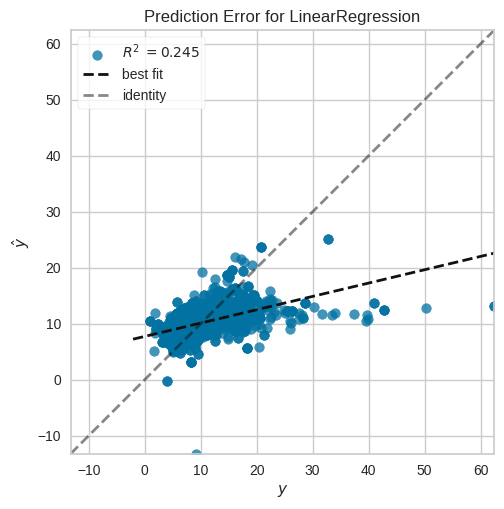

In [85]:
from yellowbrick.regressor import PredictionError

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Menghitung Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE = sqrt(MSE)
print(f'Root Mean Squared Error (RMSE): {rmse}')

visualize_result(linreg, X_train, X_test, y_train, y_test)

In [86]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(linreg, X_train, y_train, cv=kf, scoring='r2')

print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.20001283 0.20655272 0.22655944 0.24092997 0.2021714 ]
Mean cross-validation score: 0.2152452718438261


### Lasso regression

In [87]:
from sklearn.linear_model import Lasso, Ridge

lasso_alpha_list = [0.01, 0.1, 1, 10, 100]

lasso_model_list = []
for alpha in lasso_alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_model_list.append(lasso)

def metrics(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, y_pred)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

counter = 1
for model in lasso_model_list:
    y_pred = model.predict(X_test)
    print(f'Model Lasso regression ke {counter}')
    metrics(y_test, y_pred)
    print()
    counter += 1

Model Lasso regression ke 1
MAE: 1.9890051853624335
MSE: 11.12886835728881
RMSE: 3.335995856905223
R_squared: 0.24426904700079

Model Lasso regression ke 2
MAE: 1.9984234475834501
MSE: 11.22488868774617
RMSE: 3.350356501589968
R_squared: 0.23774856949003642

Model Lasso regression ke 3
MAE: 2.2606327430640167
MSE: 13.34881317125314
RMSE: 3.6536027659357195
R_squared: 0.09351867814013903

Model Lasso regression ke 4
MAE: 2.4709731712358582
MSE: 14.740982273868207
RMSE: 3.83939868649613
R_squared: -0.0010197105691018837

Model Lasso regression ke 5
MAE: 2.4709731712358582
MSE: 14.740982273868207
RMSE: 3.83939868649613
R_squared: -0.0010197105691018837



In [88]:
selected_lasso = lasso_model_list[0]
y_pred_lasso = selected_lasso.predict(X_test)
y_pred_lasso

array([ 8.48245731, 11.40201747, 11.54084882, ...,  8.21426218,
       10.26436591,  9.16022096])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


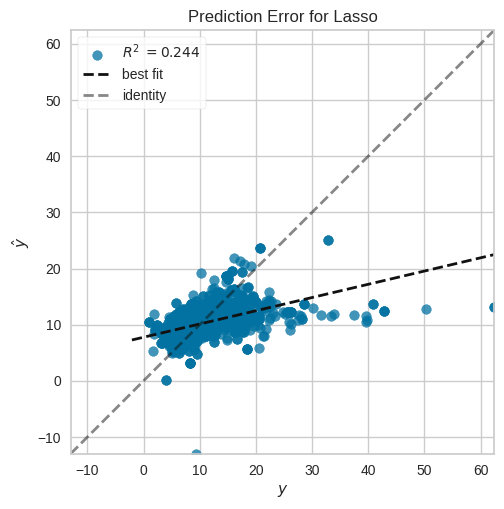

In [89]:
visualize_result(selected_lasso, X_train, X_test, y_train, y_test)

### Ridge regression

In [90]:
ridge_alpha_list = [0.01, 0.1, 1, 10, 100]

ridge_model_list = []
for alpha in ridge_alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_model_list.append(ridge)

counter = 1
for model in ridge_model_list:
    y_pred = model.predict(X_test)
    print(f'Model Ridge regression ke {counter}')
    metrics(y_test, y_pred)
    print()
    counter += 1

Model Ridge regression ke 1
MAE: 1.9889683818195465
MSE: 11.125095882586086
RMSE: 3.3354303894079527
R_squared: 0.24452522541990018

Model Ridge regression ke 2
MAE: 1.9889678135644335
MSE: 11.125097004316203
RMSE: 3.3354305575616774
R_squared: 0.244525149246282

Model Ridge regression ke 3
MAE: 1.98896213226644
MSE: 11.125108247840442
RMSE: 3.3354322430294463
R_squared: 0.2445243857293622

Model Ridge regression ke 4
MAE: 1.9889074183819568
MSE: 11.125223297260284
RMSE: 3.335449489538147
R_squared: 0.24451657303853802

Model Ridge regression ke 5
MAE: 1.9884710505939478
MSE: 11.126627266062398
RMSE: 3.3356599446080226
R_squared: 0.24442123336457122



In [91]:
selected_ridge = ridge_model_list[0]
y_pred_ridge = selected_ridge.predict(X_test)
y_pred_ridge

array([ 8.46621068, 11.41293916, 11.55697095, ...,  8.19987671,
       10.26799673,  9.1431681 ])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


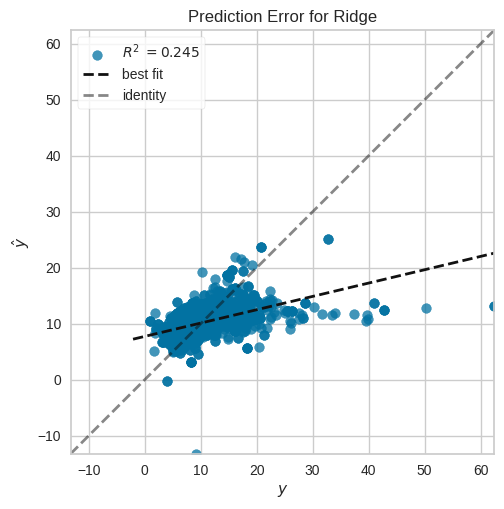

In [92]:
visualize_result(selected_ridge, X_train, X_test, y_train, y_test)

### Random forest

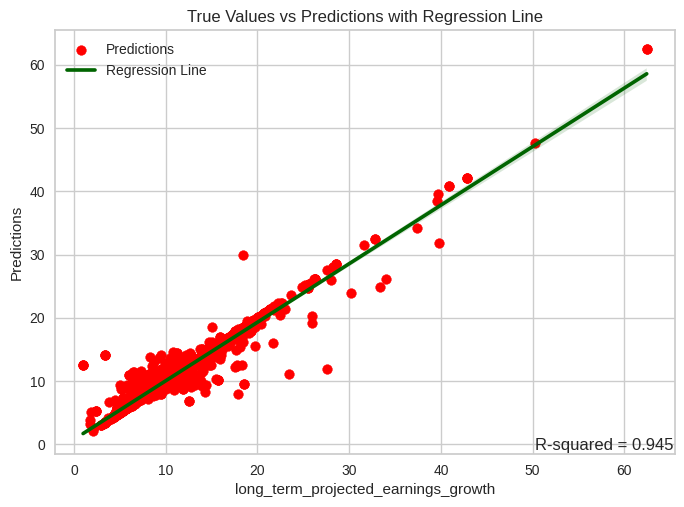

In [93]:
# Inisialisasi model Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=999)

# Melatih model pada data latih
rf_regressor.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = rf_regressor.predict(X_test)

# Mengukur performa model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE = sqrt(MSE)
mae = mean_absolute_error(y_test, y_pred)

plt.scatter(y_test, y_pred, label='Predictions', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Menambahkan garis regresi
sns.regplot(x=y_test, y=y_pred, scatter=False, ax=plt.gca(), color='darkgreen', label='Regression Line')

# Menghitung dan menambahkan R-squared ke plot
r_squared = r2_score(y_test, y_pred)
plt.text(plt.xlim()[1] - 0.2, plt.ylim()[0] + 0.2, f'R-squared = {r_squared:.3f}', ha='right', va='bottom')

# Menampilkan legenda
plt.legend()

plt.title('True Values vs Predictions with Regression Line')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


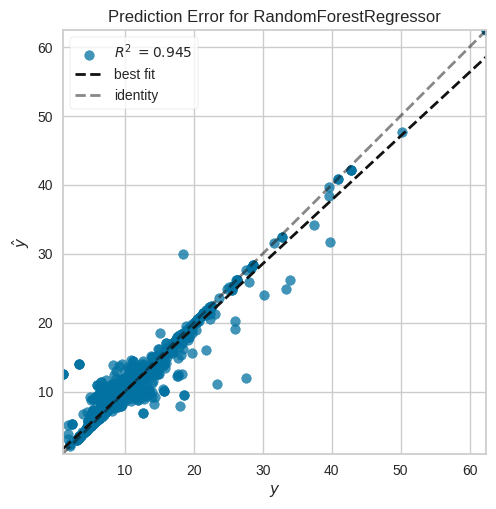

In [94]:
visualize_result(rf_regressor, X_train, X_test, y_train, y_test)

In [95]:
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

R-squared: 0.9447801456408504
Mean Squared Error: 0.8131657006144607
Root Mean Squared Error: 0.901757007521683
Mean Absolute Error: 0.24400526771072395


In [96]:
# Menerapkan K-fold cross-validation dengan K=5
kf = KFold(n_splits=5, shuffle=True, random_state=999)

# Mengukur performa model menggunakan cross_val_score
r2_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')
mse_scores = -cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = mse_scores**0.5
mae_scores = -cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Menampilkan hasil cross-validation
print(f'R-squared scores: {r2_scores}')
print(f'Mean R-squared: {r2_scores.mean()}')

print(f'Mean Squared Error scores: {mse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')

print(f'Mean Absolute Error scores: {mae_scores}')
print(f'Mean MAE: {mae_scores.mean()}')

R-squared scores: [0.94685938 0.95018    0.93111666 0.90475908 0.95718845]
Mean R-squared: 0.9380207135443908
Mean Squared Error scores: [0.78254697 0.77443247 1.00386106 1.59782887 0.64803898]
Mean RMSE: 0.9671250414125098
Mean Absolute Error scores: [0.24208469 0.24557358 0.24657873 0.26452457 0.22960504]
Mean MAE: 0.2456733219038109


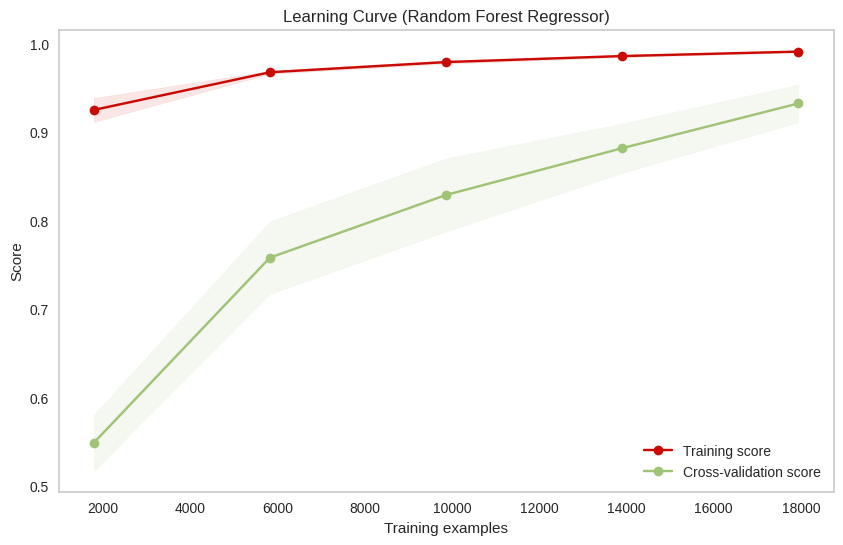

In [97]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(rf_regressor, "Learning Curve (Random Forest Regressor)", X, y, cv=5)
plt.show()

# Pendekatan kedua

In [98]:
url = 'https://raw.githubusercontent.com/afiqilyasakmal/european-investment-management/main/data/european-investment-management-train.csv'
df_baru_2 = pd.read_csv(url)
df_baru_2.head()

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth,book_value_growth,roa,roe,roic,bond_interest_rate_sensitivity,bond_credit_quality,average_coupon_rate,average_credit_quality,modified_duration,effective_maturity,asset_stock,asset_bond,asset_cash,asset_other,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,market_cap_giant,market_cap_large,market_cap_medium,market_cap_small,market_cap_micro,credit_aaa,credit_aa,credit_a,credit_bbb,credit_bb,credit_b,credit_below_b,credit_not_rated,holdings_n_stock,holdings_n_bonds,ongoing_cost,management_fees,environmental_score,social_score,governance_score,sustainability_score,sustainability_rank,sustainability_percentage_rank,involvement_abortive_contraceptive,involvement_alcohol,involvement_animal_testing,involvement_controversial_weapons,involvement_gambling,involvement_gmo,involvement_military_contracting,involvement_nuclear,involvement_palm_oil,involvement_pesticides,involvement_small_arms,involvement_thermal_coal,involvement_tobacco,nav_per_share_currency,nav_per_share,shareclass_size_currency,shareclass_size,fund_size_currency,fund_size,fund_trailing_return_ytd,fund_trailing_return_3years,fund_trailing_return_5years,fund_trailing_return_10years,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,fund_return_2015,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,fund_return_2019_q3,fund_return_2019_q2,fund_return_2019_q1,fund_return_2018_q4,fund_return_2018_q3,fund_return_2018_q2,fund_return_2018_q1,fund_return_2017_q4,fund_return_2017_q3,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,8.66,3.06,4.72,0.16,2.75,6.38,14.04,11.80,NaN,NaN,NaN,NaN,NaN,NaN,98.55,0.00,1.45,0.00,14.17,2.35,18.69,NaN,4.31,9.30,NaN,9.28,7.74,23.95,10.21,30.75,39.04,16.80,10.69,2.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,6.16,8.72,8.73,24.38,1.0,89.0,9.67,2.86,11.77,0.00,0.00,0.00,0.00,1.37,0.0,0.00,0.00,0.00,0.00,GBP,241.84,NOK,261930000.0,NOK,6.566210e+09,1.40,2.08,10.28,NaN,18.51,-11.31,15.24,28.74,NaN,5.66,18.05,-24.50,2.42,-0.41,8.18,7.40,-14.03,5.37,5.56,-7.25,3.53,1.79,1.95,7.25,6.06,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,9.34,14.30,7.55,8.56,9.59,7.36,14.61,11.33,NaN,NaN,NaN,NaN,NaN,NaN,96.81,0.57,2.63,-0.01,8.17,14.42,18.82,NaN,2.96,15.34,1.59,NaN,NaN,17.32,21.39,1.14,0.00,66.33,32.53,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,1.0,0.8400,0.75,5.31,8.85,7.16,26.08,2.0,78.0,3.93,0.00,14.93,0.00,0.00,0.00,4.91,0.00,0.0,2.38,0.00,1.59,0.00,USD,3.96,USD,17010000.0,USD,7.717900e+08,1.65,6.66,12.09,NaN,25.39,-5.72,1.74,41.98,7.12,0.89,17.82,-24.09,0.12,4.68,8.60,10.16,-16.02,6.56,11.32,-5.35,5.29,-1.81,-1.71,0.12,11.94,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,16.87,NaN,13.80,21.53,14.76,7.83,16.35,11.62,NaN,NaN,NaN,NaN,NaN,NaN,95.92,0.00,2.21,1.87,6.35,22.32,10.82,0.44,11.74,3.37,NaN,17.14,NaN,4.39,23.42,62.38,21.08,11.85,3.33,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,1.0182,0.75,4.23,8.38,6.99,24.98,4.0,44.0,0.26,0.00,2.83,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,GBP,2.32,GBP,30900000.0,GBP,1.282800e+08,45.43,13.19,18.48,7.76,22.29,-19.51,29.12,24.70,-5.99,17.13,27.23,-9.07,6.64,1.

In [99]:
df_baru_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22420 entries, 0 to 22419
Columns: 117 entries, ticker to rating
dtypes: float64(105), int64(2), object(10)
memory usage: 20.0+ MB


In [100]:
data_types = df_baru_2.dtypes

categorical_columns = data_types[data_types == 'object'].index.tolist()
categorical_columns

['ticker',
 'category',
 'dividend_frequency',
 'equity_style',
 'equity_size',
 'bond_interest_rate_sensitivity',
 'bond_credit_quality',
 'nav_per_share_currency',
 'shareclass_size_currency',
 'fund_size_currency']

## Fungsi-fungsi penting

In [101]:
# Fungsi untuk mencari missing values
def get_missing_info(df):

    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    missing_info = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Missing Values Percentage': missing_percentage.values
    })

    missing_info = missing_info.sort_values(by='Missing Values Percentage', ascending=False)
    return missing_info

In [102]:
# Fungsi untuk melakukan hyperparameter tuning
def grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
    grid_search.fit(X, y)
    return grid_search.best_estimator_, np.sqrt(grid_search.best_score_)

In [103]:
# Fungsi untuk menampilkan metrics dari hasil prediksi
def metrics(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, y_pred)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [104]:
# Fungsi untuk melakukan cross validation
def cross_validation_metrics(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits)

    mae_scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(mean_absolute_error))
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(mean_squared_error))
    rmse_scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))))
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    print(f'Model: {model.__class__.__name__}')
    print('MAE:', np.mean(mae_scores))
    print('MSE:', np.mean(mse_scores))
    print('RMSE:', np.mean(rmse_scores))
    print('R-squared:', np.mean(r2_scores))
    print("\n")


In [105]:
# Fungsi untuk menampilkan hasil fitting model
def visualize_result(model, X_train, X_test, y_train, y_test):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    # Membuat prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung MSE, MAE, dan RMSE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Menampilkan nilai error
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

In [106]:
# Fungsi untuk menampilkan residual plot dari hasil fitting model
def visualize_residual(model, X_train, X_test, y_train, y_test):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

In [107]:
# Fungsi untuk mengkonversi size ke currency USD
def convert_to_usd(row, column, currency):
  currency = row[currency]
  size = row[column]
  rate = exchange_rates.get(currency, 1.0)
  return size * rate

## Data preparation

In [108]:
# Lihat data duplikat
duplikat_train = df_baru_2[df_baru_2.duplicated()]
duplikat_train

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth,book_value_growth,roa,roe,roic,bond_interest_rate_sensitivity,bond_credit_quality,average_coupon_rate,average_credit_quality,modified_duration,effective_maturity,asset_stock,asset_bond,asset_cash,asset_other,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,market_cap_giant,market_cap_large,market_cap_medium,market_cap_small,market_cap_micro,credit_aaa,credit_aa,credit_a,credit_bbb,credit_bb,credit_b,credit_below_b,credit_not_rated,holdings_n_stock,holdings_n_bonds,ongoing_cost,management_fees,environmental_score,social_score,governance_score,sustainability_score,sustainability_rank,sustainability_percentage_rank,involvement_abortive_contraceptive,involvement_alcohol,involvement_animal_testing,involvement_controversial_weapons,involvement_gambling,involvement_gmo,involvement_military_contracting,involvement_nuclear,involvement_palm_oil,involvement_pesticides,involvement_small_arms,involvement_thermal_coal,involvement_tobacco,nav_per_share_currency,nav_per_share,shareclass_size_currency,shareclass_size,fund_size_currency,fund_size,fund_trailing_return_ytd,fund_trailing_return_3years,fund_trailing_return_5years,fund_trailing_return_10years,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,fund_return_2015,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,fund_return_2019_q3,fund_return_2019_q2,fund_return_2019_q1,fund_return_2018_q4,fund_return_2018_q3,fund_return_2018_q2,fund_return_2018_q1,fund_return_2017_q4,fund_return_2017_q3,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating


In [109]:
# Lihat missing values
result_missing_info_df_baru_2 = get_missing_info(df_baru_2)
result_missing_info_df_baru_2

,Column,Missing Values,Missing Values Percentage
23,modified_duration,20692,92.292596
24,effective_maturity,20529,91.565566
20,bond_credit_quality,20133,89.799286
19,bond_interest_rate_sensitivity,20133,89.799286
52,credit_not_rated,19897,88.746655
...,...,...,...
10,dividend_yield_factor,0,0.000000
5,equity_size_score,0,0.000000
4,equity_size,0,0.000000
3,equity_style,0,0.000000


In [110]:
# Tentukan batas persentase missing values yang ingin Anda gunakan (misalnya, 20%)
threshold_percentage = 50

# Pilih kolom-kolom yang memiliki missing values di atas threshold
columns_to_drop_df_baru_2 = result_missing_info_df_baru_2[result_missing_info_df_baru_2['Missing Values Percentage'] > threshold_percentage]['Column']

# Drop kolom-kolom tersebut dari DataFrame
df_baru_2_2 = df_baru_2.drop(columns=columns_to_drop_df_baru_2)
columns_to_drop_df_baru_2

23                 modified_duration
24                effective_maturity
20               bond_credit_quality
19    bond_interest_rate_sensitivity
52                  credit_not_rated
51                    credit_below_b
45                        credit_aaa
46                         credit_aa
47                          credit_a
48                        credit_bbb
49                         credit_bb
50                          credit_b
22            average_credit_quality
54                  holdings_n_bonds
21               average_coupon_rate
85      fund_trailing_return_10years
2                 dividend_frequency
Name: Column, dtype: object

In [111]:
# Variabel untuk outliers

numeric_columns = df_baru_2_2.select_dtypes(include=['number'])
Q3 = numeric_columns.quantile(0.75)
Q1 = numeric_columns.quantile(0.25)
IQR = Q3 - Q1

In [112]:
Jumlah_Outlier0 = []
pd.set_option('display.max_columns', None)
for col in df_baru_2_2.select_dtypes(np.number).columns:
    outliers = ((df_baru_2_2[col] < (Q1[col] - 1.5 * IQR[col])) | (df_baru_2_2[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier0.append([col, outliers, outliers/len(df_baru_2_2)])

indexOutput0 = list(range(0, len(Jumlah_Outlier0)))

print(pd.DataFrame(Jumlah_Outlier0, columns=['Column', 'Outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True))

                            Column  Outlier  persentase
0                       asset_bond     5384    0.240143
1                      asset_stock     4672    0.208385
2             involvement_palm_oil     4436    0.197859
3                      asset_other     3848    0.171632
4                  involvement_gmo     3572    0.159322
..                             ...      ...         ...
88                    ongoing_cost       46    0.002052
89                market_cap_giant       43    0.001918
90                 management_fees       20    0.000892
91             sustainability_rank        0    0.000000
92  sustainability_percentage_rank        0    0.000000

[93 rows x 3 columns]


In [113]:
# Mencari categorical columns
data_types = df_baru_2_2.dtypes

categorical_columns = data_types[data_types == 'object'].index.tolist()
categorical_columns

['ticker',
 'category',
 'equity_style',
 'equity_size',
 'nav_per_share_currency',
 'shareclass_size_currency',
 'fund_size_currency']

In [114]:
exchange_rates = {
    'NOK': 0.089,
    'USD': 1.0,
    'GBP': 1.21,
    'EUR': 1.06,
    'CHF': 1.11,
    'JPY': 0.0067,
    'CAD': 0.72,
    'HKD': 0.13,
    'SEK': 0.089,
    'AUD': 0.63,
    'SGD': 0.73,
    'DKK': 0.14,
    'CNH': 0.14
}

# Konversi 'nav_per_share'
df_baru_2_2['nav_per_share_usd'] = df_baru_2_2.apply(lambda row: convert_to_usd(row, 'nav_per_share', 'nav_per_share_currency'), axis=1)

# Konversi 'shareclass_size'
df_baru_2_2['shareclass_size_usd'] = df_baru_2_2.apply(lambda row: convert_to_usd(row, 'shareclass_size', 'shareclass_size_currency'), axis=1)

# Konversi 'fund_size'
df_baru_2_2['fund_size_usd'] = df_baru_2_2.apply(lambda row: convert_to_usd(row, 'fund_size', 'fund_size_currency'), axis=1)

df_baru_2_2[['nav_per_share_usd', 'shareclass_size_usd', 'fund_size_usd']]
df_baru_2_2.shape

(22420, 103)

In [115]:
columns_to_be_removed = ['nav_per_share', 'nav_per_share_currency', 'shareclass_size', 'shareclass_size_currency',  'fund_size', 'fund_size_currency']
categorical_columns = [category for category in categorical_columns if category not in columns_to_be_removed]
categorical_columns

['ticker', 'category', 'equity_style', 'equity_size']

In [116]:
df_baru_3 = df_baru_2_2.drop(columns=columns_to_be_removed)
df_baru_3.shape

(22420, 97)

In [117]:
for col in df_baru_3.columns:
    df_baru_3[col] = pd.to_numeric(df_baru_3[col], errors='coerce')

# Menghitung korelasi antara variabel target dan fitur-fitur lainnya
correlation_with_target = df_baru_3.corrwith(df_baru_3['long_term_projected_earnings_growth'])


# Menentukan ambang batas
threshold = 0.1

# Fitur-fitur yang memiliki korelasi dengan variabel target di atas ambang batas
relevant_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()
relevant_features

['equity_size_score',
 'price_prospective_earnings',
 'price_book_ratio',
 'price_sales_ratio',
 'price_cash_flow_ratio',
 'dividend_yield_factor',
 'long_term_projected_earnings_growth',
 'historical_earnings_growth',
 'sales_growth',
 'cash_flow_growth',
 'book_value_growth',
 'roe',
 'roic',
 'sector_basic_materials',
 'sector_consumer_cyclical',
 'sector_financial_services',
 'sector_real_estate',
 'sector_consumer_defensive',
 'sector_utilities',
 'sector_communication_services',
 'sector_technology',
 'market_cap_large',
 'market_cap_small',
 'market_cap_micro',
 'ongoing_cost',
 'management_fees',
 'sustainability_score',
 'involvement_abortive_contraceptive',
 'involvement_animal_testing',
 'involvement_nuclear',
 'involvement_small_arms',
 'involvement_thermal_coal',
 'involvement_tobacco',
 'fund_trailing_return_ytd',
 'fund_trailing_return_3years',
 'fund_trailing_return_5years',
 'fund_return_2018',
 'fund_return_2017',
 'fund_return_2020_q3',
 'fund_return_2020_q2',
 'fund

In [118]:
relevant_categorical_columns = [category for category in categorical_columns if category in relevant_features]
relevant_categorical_columns

[]

Tidak terdapat fitur kategorikal yang relevan terhadap variabel target.

In [119]:
df_baru_4 = df_baru_3.drop(columns=categorical_columns)
df_baru_4.shape

(22420, 93)

In [120]:
# Melakukan imputasi data

# First, we need to calculate the skewness for each column
skewness_scores = df_baru_4[df_baru_4.columns].skew()

# Now, we will impute missing values based on the skewness
# If skewness is between -0.5 and 0.5, use mean; otherwise, use median

for col in df_baru_4.columns:
    skewness = skewness_scores[col]
    if skewness > -0.5 and skewness < 0.5:
        # Impute with mean
        imputer = SimpleImputer(strategy='mean')
    else:
        # Impute with median
        imputer = SimpleImputer(strategy='median')

    # Impute the column
    df_baru_4[col] = imputer.fit_transform(df_baru_4[[col]])

# Check if all missing values have been imputed
remaining_missing_values = df_baru_4[df_baru_4.columns].isnull().sum()

skewness_scores, remaining_missing_values

(equity_size_score              -0.829094
 price_prospective_earnings     18.222159
 price_book_ratio                2.627665
 price_sales_ratio               2.974297
 price_cash_flow_ratio           2.179327
                                  ...    
 quarters_down                   0.017541
 rating                         -0.100807
 nav_per_share_usd              33.385190
 shareclass_size_usd           145.778025
 fund_size_usd                  11.890593
 Length: 93, dtype: float64,
 equity_size_score             0
 price_prospective_earnings    0
 price_book_ratio              0
 price_sales_ratio             0
 price_cash_flow_ratio         0
                              ..
 quarters_down                 0
 rating                        0
 nav_per_share_usd             0
 shareclass_size_usd           0
 fund_size_usd                 0
 Length: 93, dtype: int64)

In [121]:
# Melakukan split data

X = df_baru_4.drop(["long_term_projected_earnings_growth"], axis=1)
y = df_baru_4["long_term_projected_earnings_growth"]
X.shape, y.shape

((22420, 92), (22420,))

In [122]:
# Hitung korelasi antara setiap fitur dengan target
target_corr = X.corrwith(y).abs()

# Hitung matriks korelasi antar fitur
corr_matrix = X.corr().abs()

# Set threshold untuk korelasi
threshold = 0.25

corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Memilih fitur berdasarkan korelasi dengan target dan korelasi antar fitur
drop_features = []
keep_features = []
for pair in corr_pairs:
    feature1, feature2 = pair

    # Pilih fitur dengan korelasi target yang lebih tinggi
    if target_corr[feature1] > target_corr[feature2]:
        keep_feature = feature1
        drop_feature = feature2
    else:
        keep_feature = feature2
        drop_feature = feature1

    if drop_feature not in keep_features:
        drop_features.append(drop_feature)

    if keep_feature not in keep_features:
        keep_features.append(keep_feature)

print("Dropped Features:", drop_features)
X_selected = X.drop(columns=drop_features)
print("Selected Columns:", X_selected.columns)

Dropped Features: ['equity_size_score', 'price_prospective_earnings', 'price_sales_ratio', 'price_sales_ratio', 'price_sales_ratio', 'price_sales_ratio', 'sales_growth', 'equity_size_score', 'price_sales_ratio', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'roa', 'asset_stock', 'asset_stock', 'asset_stock', 'sector_consumer_cyclical', 'price_sales_ratio', 'sector_healthcare', 'sector_healthcare', 'sector_energy', 'roa', 'sector_industrials', 'sector_industrials', 'sector_technology', 'price_sales_ratio', 'roa', 'market_cap_giant', 'market_cap_giant', 'market_cap_giant', 'market_cap_giant', 'roa', 'sector_industrials', 'market_cap_medium', 'market_cap_medium', 'market_cap_medium', 'market_cap_medium', 'market_cap_medium', 'market_cap_medium', 'market_cap_medium', 'market_cap_medium', 'management_fees', 'environmental_score', 'environmental_score', 'environmental_score', 'environmental_score', 'price_sales_ratio', 'environmental_score', 'sustainability_rank', 'sustainability_percenta

In [123]:
y.head()

0     8.66
1     9.34
2    16.87
3     7.77
4    10.02
Name: long_term_projected_earnings_growth, dtype: float64

In [124]:
# Standarisasi

## Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=123)

In [125]:
# Check the skewness of the target variable to decide on the scaler
target_skewness = y.skew()

# If the target is highly skewed, use RobustScaler, otherwise use StandardScaler
if np.abs(target_skewness) > 0.5:
    scaler = RobustScaler()
else:
    scaler = StandardScaler()

In [126]:
# Apply the scaler to the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

target_skewness, X_train_scaled.shape, X_test_scaled.shape

(3.7960481919831555, (17936, 51), (4484, 51))

In [127]:
# Melakukan feature selection

# Using a RandomForestRegressor for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=0, verbose=2)
rf.fit(X_train_scaled, y_train)

# Selecting features based on feature importance
feature_importances = rf.feature_importances_
important_features_indices = np.argsort(feature_importances)[::-1][:15] # Select top X features

selected_features = X_train.columns[important_features_indices].tolist()

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   40.9s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

In [128]:
# Reducing the dataset to the selected features
X_train_reduced_rf = X_train_scaled[:, important_features_indices]
X_test_reduced_rf = X_test_scaled[:, important_features_indices]

# Applying PCA
pca = PCA(n_components=0.95) # Retain 95% of variance
X_train_reduced_pca = pca.fit_transform(X_train_reduced_rf)
X_test_reduced_pca = pca.transform(X_test_reduced_rf)

selected_features

['dividend_yield_factor',
 'market_cap_large',
 'fund_return_2018_q3',
 'fund_return_2020_q3',
 'market_cap_small',
 'fund_trailing_return_ytd',
 'roe',
 'fund_return_2017_q1',
 'cash_flow_growth',
 'sector_real_estate',
 'sector_basic_materials',
 'price_cash_flow_ratio',
 'market_cap_micro',
 'fund_return_2016_q3',
 'fund_return_2020_q2']

## Membangun model

### Linear regression

#### Dengan Basic Feature Selection

In [129]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1.06483071e+06, 4.85334286e+05, 1.49826315e+06, ...,
       5.49999276e+07, 5.46657263e+07, 2.69984656e+08])

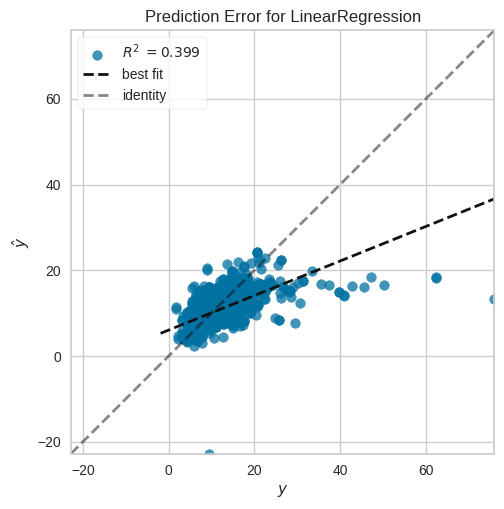

Mean Squared Error (MSE): 9.419779672958647
Mean Absolute Error (MAE): 1.7150988800366687
Root Mean Squared Error (RMSE): 3.0691659572200796


In [130]:
visualize_result(linreg, X_train_scaled, X_test_scaled, y_train, y_test)

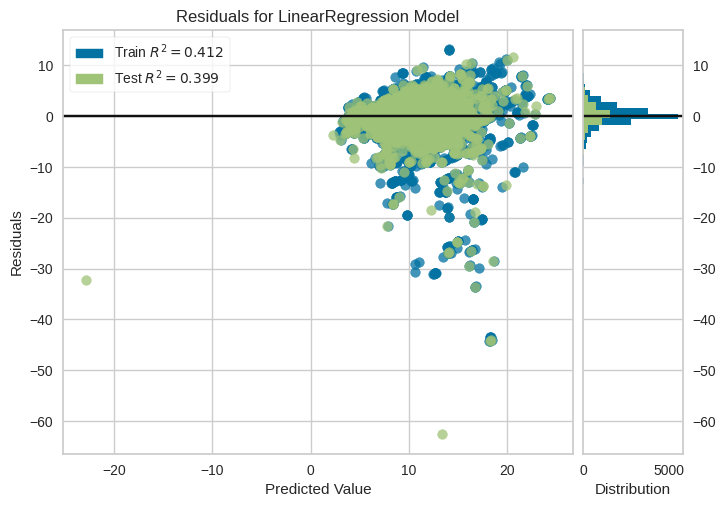

In [131]:
visualize_residual(linreg, X_train_scaled, X_test_scaled, y_train, y_test)

In [132]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(linreg, X_train_scaled, y_train, cv=kf, scoring='r2')

print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.39438698 0.40294138 0.41786635 0.42616914 0.37786656]
Mean cross-validation score: 0.4038460803460021


#### Dengan Feature Selection RF

In [133]:
linreg_rf = LinearRegression()
linreg_rf.fit(X_train_reduced_rf, y_train)

y_pred2 = linreg_rf.predict(X_test_reduced_rf)
y_pred

array([1.06483071e+06, 4.85334286e+05, 1.49826315e+06, ...,
       5.49999276e+07, 5.46657263e+07, 2.69984656e+08])

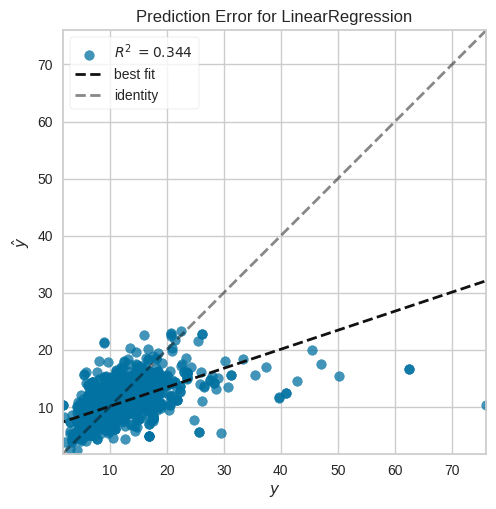

Mean Squared Error (MSE): 10.285554337102008
Mean Absolute Error (MAE): 1.7830639242020323
Root Mean Squared Error (RMSE): 3.2071099664810383


In [134]:
visualize_result(linreg_rf, X_train_reduced_rf, X_test_reduced_rf, y_train, y_test)

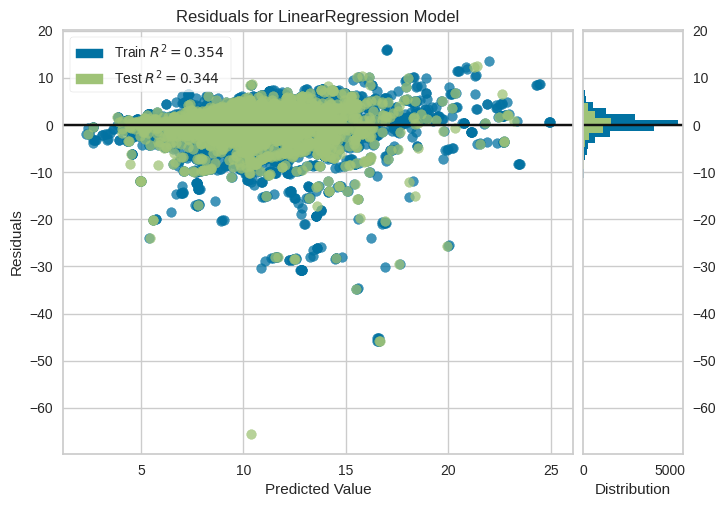

In [135]:
visualize_residual(linreg_rf, X_train_reduced_rf, X_test_reduced_rf, y_train, y_test)

#### Dengan Feature Selection RF + PCA

In [136]:
linreg_rf_pca = LinearRegression()
linreg_rf_pca.fit(X_train_reduced_pca, y_train)

y_pred2 = linreg_rf_pca.predict(X_test_reduced_pca)
y_pred

array([1.06483071e+06, 4.85334286e+05, 1.49826315e+06, ...,
       5.49999276e+07, 5.46657263e+07, 2.69984656e+08])

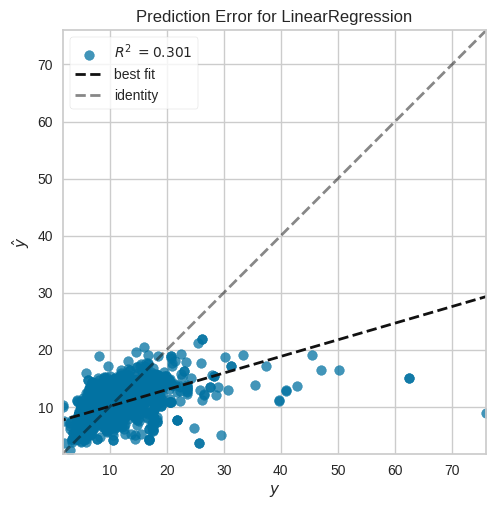

Mean Squared Error (MSE): 10.961361301183482
Mean Absolute Error (MAE): 1.8570849775887983
Root Mean Squared Error (RMSE): 3.3107946630957774


In [137]:
visualize_result(linreg_rf_pca, X_train_reduced_pca, X_test_reduced_pca, y_train, y_test)

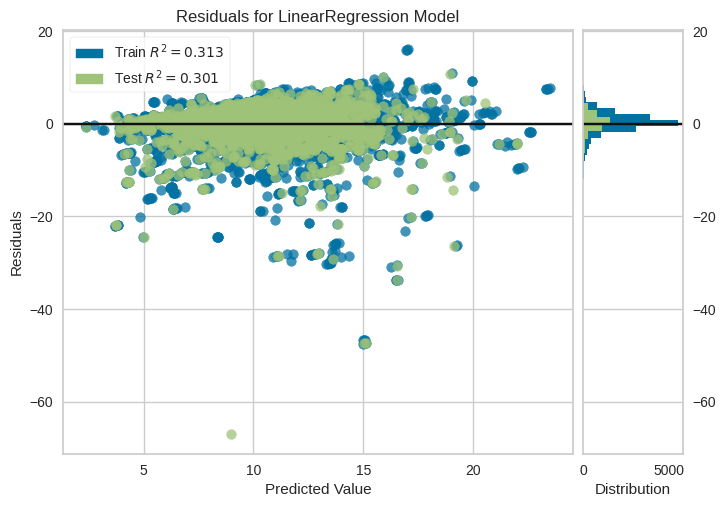

In [138]:
visualize_residual(linreg_rf_pca, X_train_reduced_pca, X_test_reduced_pca, y_train, y_test)

### Lasso Regression

In [139]:
alphas = [1, 2, 	4, 8, 10, 100]

#### Dengan Basic Feature Selection

In [140]:
mae_list = []
mse_list = []
rmse_list = []
r_squared_list = []


for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, random_state=42)
    lasso_model.fit(X_train_scaled, y_train)
    y_lasso_regression_prediction = lasso_model.predict(X_test_scaled)

    # Menganalisis metrik
    mae = mean_absolute_error(y_test, y_lasso_regression_prediction)
    mse = mean_squared_error(y_test, y_lasso_regression_prediction)
    rmse = np.sqrt(mse)
    r_squared =  r2_score(y_test, y_lasso_regression_prediction)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r_squared_list.append(r_squared)


results_df = pd.DataFrame({
    'Alpha': alphas,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'R-squared': r_squared_list
})

In [141]:
results_df

,Alpha,MAE,MSE,RMSE,R-squared
0,1,2.209074,13.164194,3.628249,0.160675
1,2,2.360355,14.448045,3.801058,0.078819
2,4,2.418707,15.217592,3.900973,0.029754
3,8,2.454746,15.688697,3.960896,-0.000283
4,10,2.455216,15.688288,3.960844,-0.000257
5,100,2.458888,15.689183,3.960957,-0.000314


In [142]:
best_alpha = results_df.loc[results_df['R-squared'].idxmax(), 'Alpha']
lasso = Lasso(alpha=best_alpha, random_state=42)
lasso.fit(X_train_scaled, y_train)
best_model_prediction =  lasso.predict(X_test_scaled)

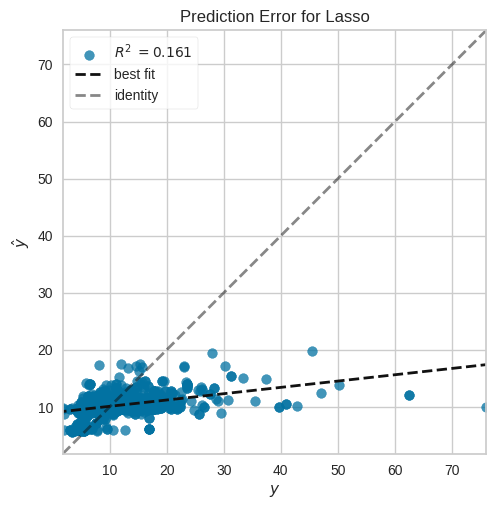

Mean Squared Error (MSE): 13.164193710090773
Mean Absolute Error (MAE): 2.209073874484823
Root Mean Squared Error (RMSE): 3.62824940020539


In [143]:
visualize_result(lasso, X_train_scaled, X_test_scaled, y_train, y_test)

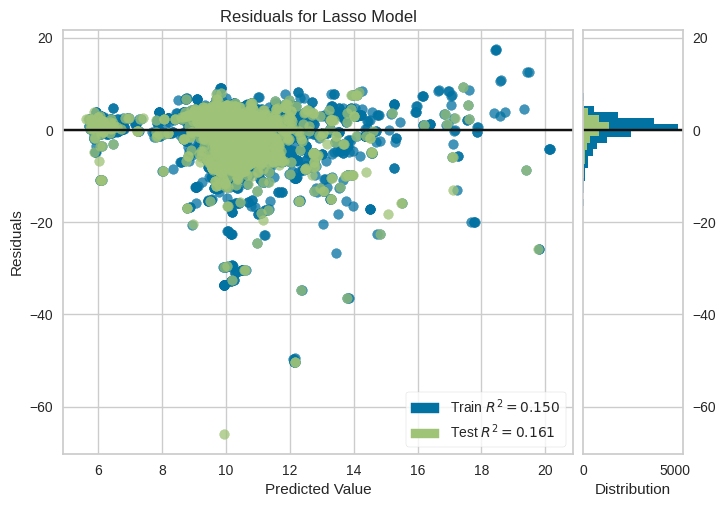

In [144]:
visualize_residual(lasso, X_train_scaled, X_test_scaled, y_train, y_test)

#### Dengan Feature Selection RF

In [145]:
mae_list = []
mse_list = []
rmse_list = []
r_squared_list = []


for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, random_state=42)
    lasso_model.fit(X_train_reduced_rf, y_train)
    y_lasso_regression_prediction = lasso_model.predict(X_test_reduced_rf)

    # Menganalisis metrik
    mae = mean_absolute_error(y_test, y_lasso_regression_prediction)
    mse = mean_squared_error(y_test, y_lasso_regression_prediction)
    rmse = np.sqrt(mse)
    r_squared =  r2_score(y_test, y_lasso_regression_prediction)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r_squared_list.append(r_squared)


results_df = pd.DataFrame({
    'Alpha': alphas,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'R-squared': r_squared_list
})

In [146]:
results_df

,Alpha,MAE,MSE,RMSE,R-squared
0,1,2.210980,13.158454,3.627458,0.161041
1,2,2.363115,14.443125,3.800411,0.079132
2,4,2.422602,15.210238,3.900030,0.030223
3,8,2.458888,15.689183,3.960957,-0.000314
4,10,2.458888,15.689183,3.960957,-0.000314
5,100,2.458888,15.689183,3.960957,-0.000314


In [147]:
best_alpha = results_df.loc[results_df['R-squared'].idxmax(), 'Alpha']
lasso_rf = Lasso(alpha=best_alpha, random_state=42)
lasso_rf.fit(X_train_reduced_rf, y_train)
best_model_prediction =  lasso_rf.predict(X_test_reduced_rf)

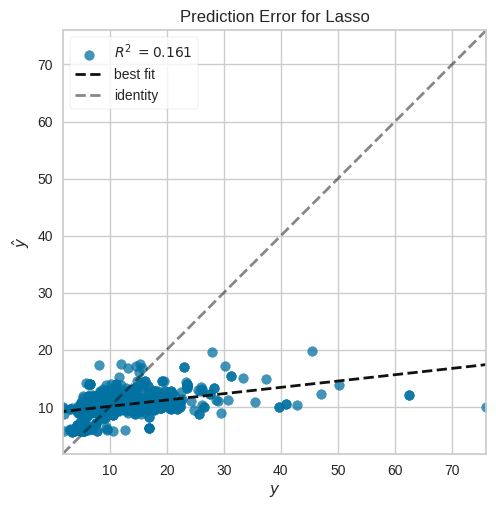

Mean Squared Error (MSE): 13.158453527262788
Mean Absolute Error (MAE): 2.210979857532156
Root Mean Squared Error (RMSE): 3.62745827367632


In [148]:
visualize_result(lasso_rf, X_train_reduced_rf, X_test_reduced_rf, y_train, y_test)

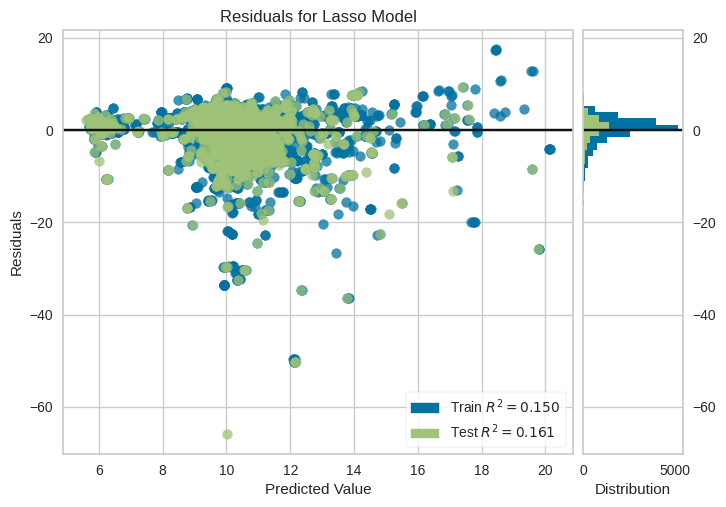

In [149]:
visualize_residual(lasso_rf, X_train_reduced_rf, X_test_reduced_rf, y_train, y_test)

#### Dengan Feature Selection RF + PCA

In [150]:
mae_list = []
mse_list = []
rmse_list = []
r_squared_list = []


for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, random_state=42)
    lasso_model.fit(X_train_reduced_pca, y_train)
    y_lasso_regression_prediction = lasso_model.predict(X_test_reduced_pca)

    # Menganalisis metrik
    mae = mean_absolute_error(y_test, y_lasso_regression_prediction)
    mse = mean_squared_error(y_test, y_lasso_regression_prediction)
    rmse = np.sqrt(mse)
    r_squared =  r2_score(y_test, y_lasso_regression_prediction)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r_squared_list.append(r_squared)


results_df = pd.DataFrame({
    'Alpha': alphas,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'R-squared': r_squared_list
})

In [151]:
results_df

,Alpha,MAE,MSE,RMSE,R-squared
0,1,2.004949,11.791147,3.433824,0.248218
1,2,2.180162,13.034089,3.610275,0.168970
2,4,2.411998,15.053994,3.879948,0.040184
3,8,2.458888,15.689183,3.960957,-0.000314
4,10,2.458888,15.689183,3.960957,-0.000314
5,100,2.458888,15.689183,3.960957,-0.000314


In [152]:
best_alpha = results_df.loc[results_df['R-squared'].idxmax(), 'Alpha']
lasso_rf_pca = Lasso(alpha=best_alpha, random_state=42)
lasso_rf_pca.fit(X_train_reduced_pca, y_train)
best_model_prediction =  lasso_rf_pca.predict(X_test_reduced_pca)

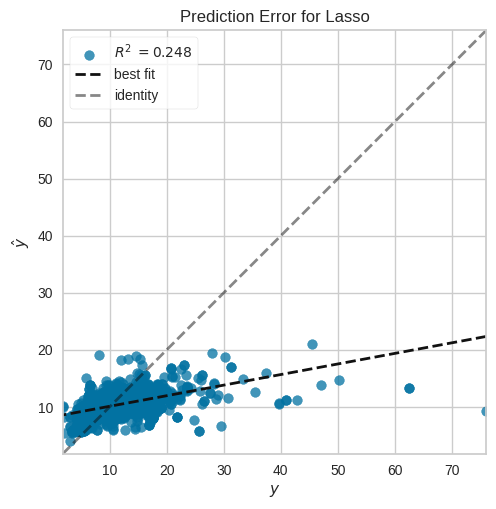

Mean Squared Error (MSE): 11.791146785549873
Mean Absolute Error (MAE): 2.004948969837399
Root Mean Squared Error (RMSE): 3.4338239304818576


In [153]:
visualize_result(lasso_rf_pca, X_train_reduced_pca, X_test_reduced_pca, y_train, y_test)

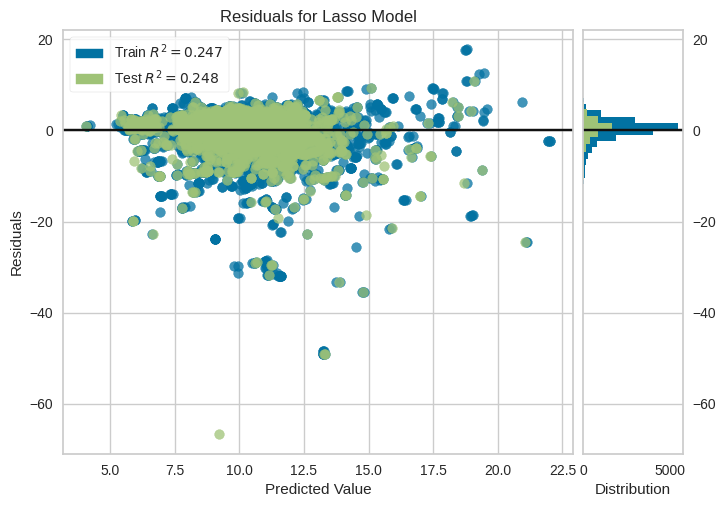

In [154]:
visualize_residual(lasso_rf_pca, X_train_reduced_pca, X_test_reduced_pca, y_train, y_test)

### Ridge Regression

In [155]:
alphas = [0.01, 0.1, 1, 10, 100, 10000, 1000000]

#### Dengan Basic Feature Selection

In [156]:
mae_list = []
mse_list = []
rmse_list = []
r_squared_list = []


for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    y_ridge_regression_prediction = ridge_model.predict(X_test_scaled)

    # Menganalisis metrik
    mae = mean_absolute_error(y_test, y_ridge_regression_prediction)
    mse = mean_squared_error(y_test, y_ridge_regression_prediction)
    rmse = np.sqrt(mse)
    r_squared =  r2_score(y_test, y_ridge_regression_prediction)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r_squared_list.append(r_squared)


results_ridge_df = pd.DataFrame({
    'Alpha': alphas,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'R-squared': r_squared_list
})

In [157]:
results_ridge_df

,Alpha,MAE,MSE,RMSE,R-squared
0,0.01,1.715099,9.419784,3.069167,0.399412
1,0.10,1.715097,9.419823,3.069173,0.399409
2,1.00,1.715084,9.420209,3.069236,0.399384
3,10.00,1.714951,9.424076,3.069866,0.399138
4,100.00,1.713760,9.463219,3.076235,0.396642
5,10000.00,1.745573,11.728634,3.424709,0.252203
6,1000000.00,2.307288,14.390782,3.793518,0.082470


In [158]:
best_alpha = results_ridge_df.loc[results_ridge_df['R-squared'].idxmax(), 'Alpha']
ridge = Ridge(alpha=best_alpha, random_state=42)
ridge.fit(X_train_scaled, y_train)
best_model_prediction =  ridge.predict(X_test_scaled)

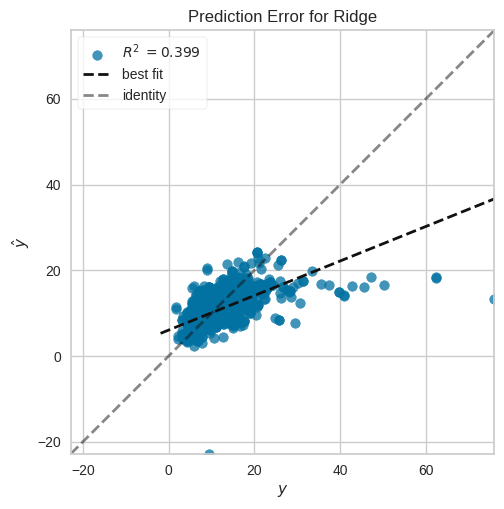

Mean Squared Error (MSE): 9.419783962565381
Mean Absolute Error (MAE): 1.7150987303142693
Root Mean Squared Error (RMSE): 3.069166656042871


In [159]:
visualize_result(ridge, X_train_scaled, X_test_scaled, y_train, y_test)

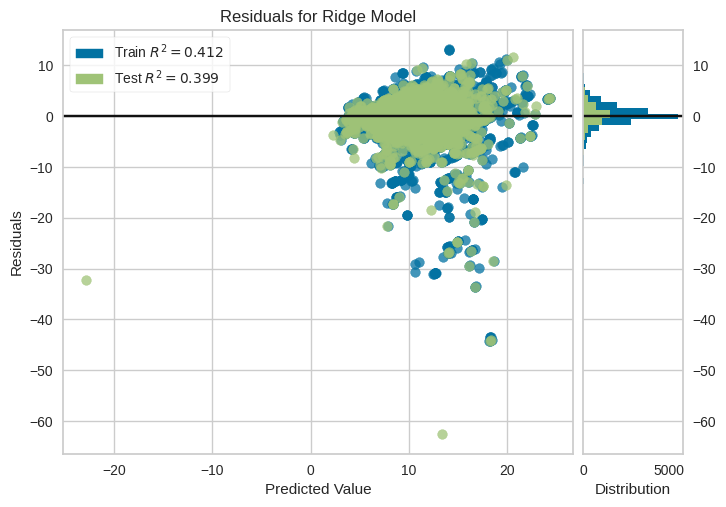

In [160]:
visualize_residual(ridge, X_train_scaled, X_test_scaled, y_train, y_test)

#### Dengan Feature Selection RF

In [161]:
mae_list = []
mse_list = []
rmse_list = []
r_squared_list = []


for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_reduced_rf, y_train)
    y_ridge_regression_prediction = ridge_model.predict(X_test_reduced_rf)

    # Menganalisis metrik
    mae = mean_absolute_error(y_test, y_ridge_regression_prediction)
    mse = mean_squared_error(y_test, y_ridge_regression_prediction)
    rmse = np.sqrt(mse)
    r_squared =  r2_score(y_test, y_ridge_regression_prediction)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r_squared_list.append(r_squared)


results_ridge_df = pd.DataFrame({
    'Alpha': alphas,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'R-squared': r_squared_list
})

In [162]:
results_ridge_df

,Alpha,MAE,MSE,RMSE,R-squared
0,0.01,1.783064,10.285554,3.207110,0.344212
1,0.10,1.783063,10.285555,3.207110,0.344212
2,1.00,1.783059,10.285560,3.207111,0.344211
3,10.00,1.783014,10.285616,3.207120,0.344208
4,100.00,1.782594,10.286236,3.207216,0.344168
5,10000.00,1.814539,10.547073,3.247626,0.327538
6,1000000.00,2.345767,14.425804,3.798132,0.080237


In [163]:
best_alpha = results_ridge_df.loc[results_ridge_df['R-squared'].idxmax(), 'Alpha']
ridge_rf = Ridge(alpha=best_alpha, random_state=42)
ridge_rf.fit(X_train_reduced_rf, y_train)
best_model_prediction =  ridge_rf.predict(X_test_reduced_rf)

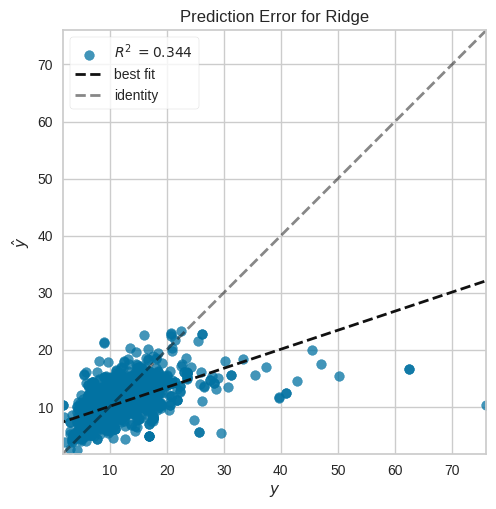

Mean Squared Error (MSE): 10.28555439813271
Mean Absolute Error (MAE): 1.783063874183598
Root Mean Squared Error (RMSE): 3.207109975995945


In [164]:
visualize_result(ridge_rf, X_train_reduced_rf, X_test_reduced_rf, y_train, y_test)

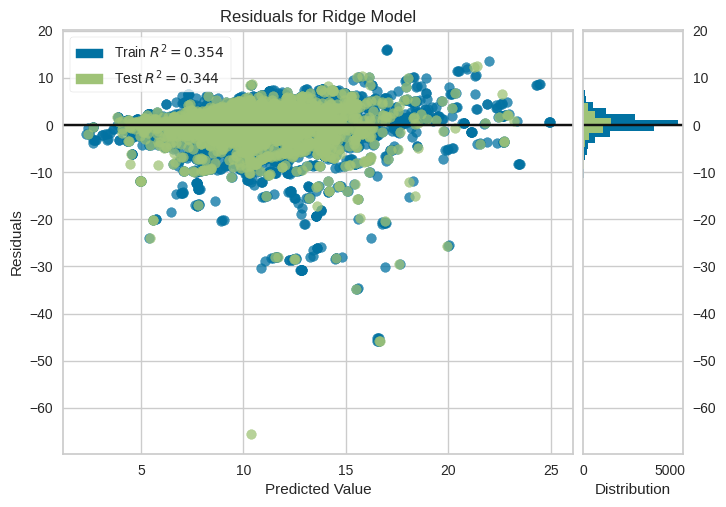

In [165]:
visualize_residual(ridge_rf, X_train_reduced_rf, X_test_reduced_rf, y_train, y_test)

#### Dengan Feature Selection RF + PCA

In [166]:
mae_list = []
mse_list = []
rmse_list = []
r_squared_list = []


for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_reduced_pca, y_train)
    y_ridge_regression_prediction = ridge_model.predict(X_test_reduced_pca)

    # Menganalisis metrik
    mae = mean_absolute_error(y_test, y_ridge_regression_prediction)
    mse = mean_squared_error(y_test, y_ridge_regression_prediction)
    rmse = np.sqrt(mse)
    r_squared =  r2_score(y_test, y_ridge_regression_prediction)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r_squared_list.append(r_squared)


results_ridge_df = pd.DataFrame({
    'Alpha': alphas,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'R-squared': r_squared_list
})

In [167]:
results_ridge_df

,Alpha,MAE,MSE,RMSE,R-squared
0,0.01,1.857085,10.961361,3.310795,0.301123
1,0.10,1.857085,10.961361,3.310795,0.301123
2,1.00,1.857085,10.961355,3.310794,0.301124
3,10.00,1.857087,10.961297,3.310785,0.301127
4,100.00,1.857111,10.960732,3.310700,0.301163
5,10000.00,1.876990,11.018919,3.319476,0.297454
6,1000000.00,2.347021,14.438344,3.799782,0.079437


In [168]:
best_alpha = results_ridge_df.loc[results_ridge_df['R-squared'].idxmax(), 'Alpha']
ridge_rf_pca = Ridge(alpha=best_alpha, random_state=42)
ridge_rf_pca.fit(X_train_reduced_pca, y_train)
best_model_prediction =  ridge_rf_pca.predict(X_test_reduced_pca)

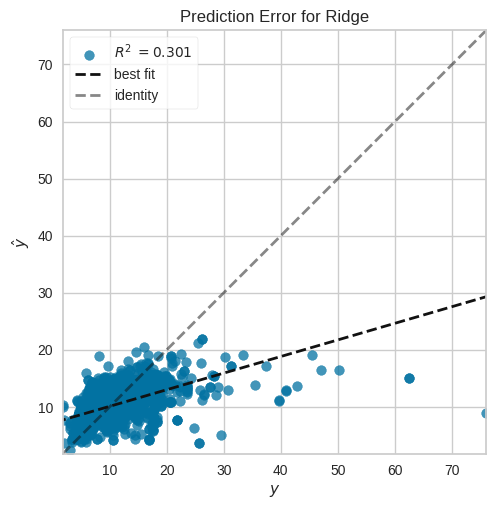

Mean Squared Error (MSE): 10.960732190552452
Mean Absolute Error (MAE): 1.8571107835080813
Root Mean Squared Error (RMSE): 3.3106996527248516


In [169]:
visualize_result(ridge_rf_pca, X_train_reduced_pca, X_test_reduced_pca, y_train, y_test)

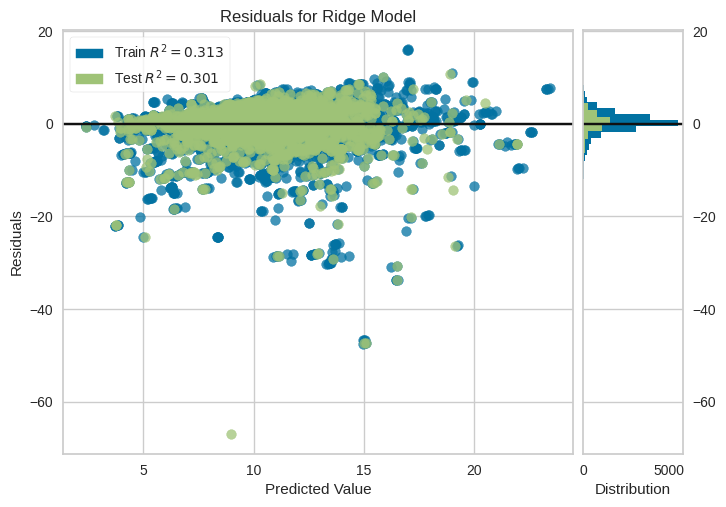

In [170]:
visualize_residual(ridge_rf_pca, X_train_reduced_pca, X_test_reduced_pca, y_train, y_test)

### Random Forest Regressor

#### Dengan Basic Feature Selection

In [171]:
model_rfr = RandomForestRegressor(verbose=2)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   39.3s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


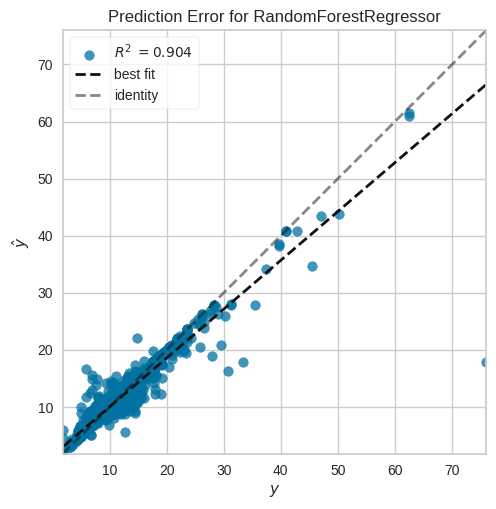

Mean Squared Error (MSE): 1.5097337682515608
Mean Absolute Error (MAE): 0.33533278322926025
Root Mean Squared Error (RMSE): 1.2287122398070107


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


In [172]:
visualize_result(model_rfr, X_train_scaled, X_test_scaled, y_train, y_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


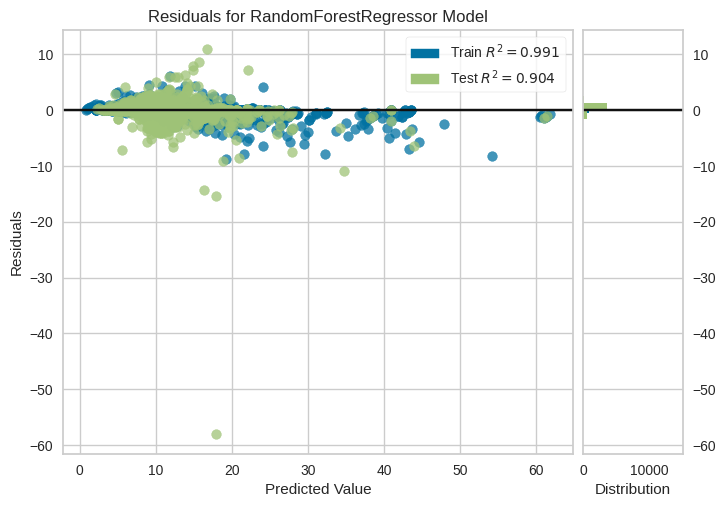

In [173]:
visualize_residual(model_rfr, X_train_scaled, X_test_scaled, y_train, y_test)

#### Dengan Feature Selection RF

In [174]:
model_rfr_rf = RandomForestRegressor(verbose=2)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   13.9s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


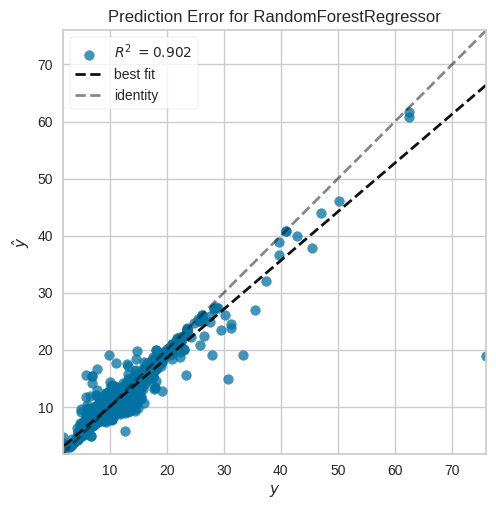

Mean Squared Error (MSE): 1.5315299877140942
Mean Absolute Error (MAE): 0.35051563336306946
Root Mean Squared Error (RMSE): 1.237549994026138


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


In [175]:
visualize_result(model_rfr_rf, X_train_reduced_rf, X_test_reduced_rf, y_train, y_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


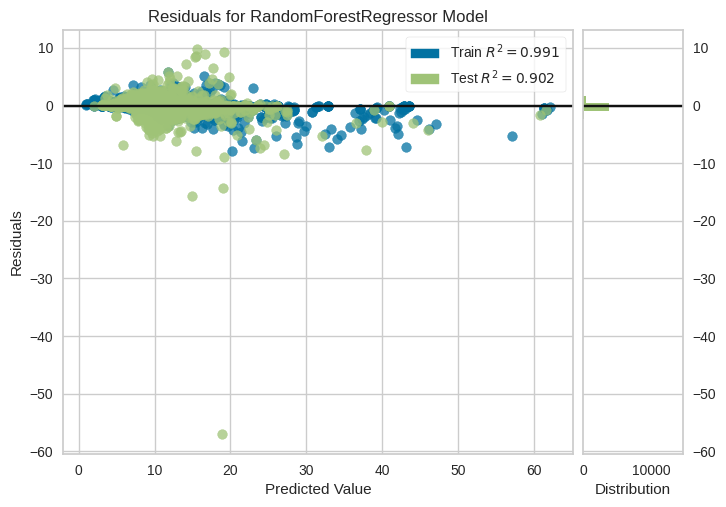

In [176]:
visualize_residual(model_rfr_rf, X_train_reduced_rf, X_test_reduced_rf, y_train, y_test)

#### Dengan Feature Selection RF + PCA

In [177]:
model_rfr_rf_pca = RandomForestRegressor(verbose=2)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    7.5s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


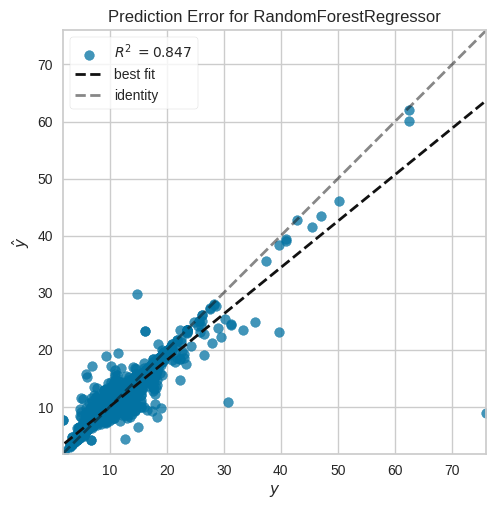

Mean Squared Error (MSE): 2.394811357662801
Mean Absolute Error (MAE): 0.5224303300624447
Root Mean Squared Error (RMSE): 1.5475178052813483


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


In [178]:
visualize_result(model_rfr_rf_pca, X_train_reduced_pca, X_test_reduced_pca, y_train, y_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


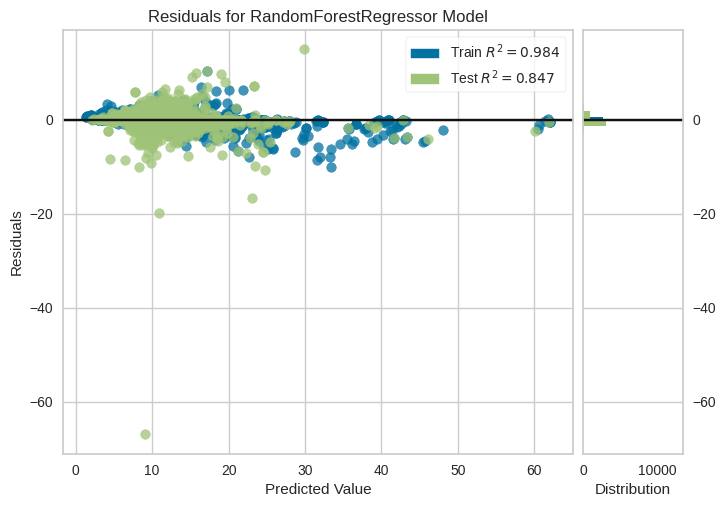

In [179]:
visualize_residual(model_rfr_rf_pca, X_train_reduced_pca, X_test_reduced_pca, y_train, y_test)